# *Prediksi Batu Gunting Kertas* ##

### Mengintall Tensorflow

In [1]:
!pip install tensorflow


## Download Dataset dari GitHub

In [2]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

## Data Preprocessing and Augmentation

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4  # Membagi dataset 40% untuk validation
)

train_generator = datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Membuat sebuah model

In [27]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Menghindari overfitting
    layers.Dense(256, activation='relu'),  # Hidden layer tambahan
    layers.Dropout(0.5),  # Menghindari overfitting
    layers.Dense(3, activation='softmax')
])


## Mengkompilasi dan Melatih Model

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Melatih Model

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Sesuaikan dengan durasi waktu pelatihan
)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4718 - loss: 0.9989 - val_accuracy: 0.9086 - val_loss: 0.2581
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8438 - loss: 0.4188 - val_accuracy: 0.8000 - val_loss: 0.2175
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9012 - loss: 0.2911 - val_accuracy: 0.9514 - val_loss: 0.1842
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9375 - loss: 0.1920 - val_accuracy: 1.0000 - val_loss: 0.0889
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9528 - loss: 0.1688 - val_accuracy: 0.9630 - val_loss: 0.1046
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.1134 - val_accuracy: 0.9000 - val_loss: 0.2409
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9684 - loss: 0.1021 - val_accuracy: 0.9792 - val_loss: 0.0855
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.0862 - val_accuracy: 0.9000 - val_lo

## Mengevaluasi Model
- menampilkan akurasi pada data validasidengan akurasi 96%

In [43]:
# Menghitung akurasi pada validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Akurasi pada data validasi: {val_accuracy:.2f}")


28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 545ms/step - accuracy: 0.9582 - loss: 0.1502
Akurasi pada data validasi: 0.96


In [75]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

## Memprediksi Gambar

In [56]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.

    result = model.predict(img_array)
    classes = ['rock', 'paper', 'scissors']
    predicted_class = classes[np.argmax(result)]
    print(f"Gambar diprediksi sebagai: {predicted_class}")


### Memanggil gambar dengan Path

In [73]:
image_path = '/content/rockpaperscissors/images (1).jpeg'

### Fungsi Prediksi dan Tampilan

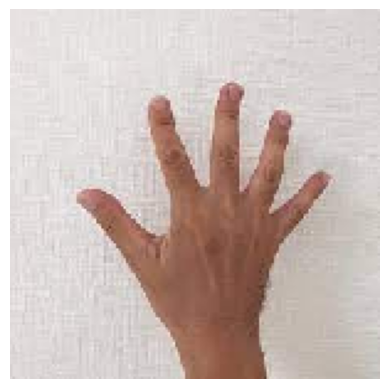

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Hasil prediksi (softmax): [[0.43723533 0.55952907 0.00323558]]
Gambar diprediksi sebagai: paper


In [74]:
# Fungsi untuk memprediksi dan menampilkan hasil prediksi
def predict_and_show_image(img_path):
    # Memuat dan menampilkan gambar
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')  # Menghilangkan axis
    plt.show()

    # Memprediksi
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.

    # Melakukan prediksi
    result = model.predict(img_array)
    print(f"Hasil prediksi (softmax): {result}")  # Menampilkan hasil softmax

    classes = ['rock', 'paper', 'scissors']
    predicted_class = classes[np.argmax(result)]
    print(f"Gambar diprediksi sebagai: {predicted_class}")

# Memanggil fungsi untuk memprediksi gambar
predict_and_show_image(image_path)


proyek ML saya ini digunakan untuk mengklasifikasikan gambar batu, gunting, dan kertas, melakukan praproses pada set data, melatih model, mengevaluasi kinerjanya, dan menentukan fungsi untuk membuat prediksi pada gambar.